In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from gait_analysis import *
import os
import re
leg_combos = get_leg_combos() # set up combinations of legs

# load step data
You can look at one movie clip, or combine data from several clips

In [2]:
# load data from experiments ... input is the path to a directory that has gait data
# each experiment should be in a separate folder
# each treatment within an experiment should be in a separate folder
tardi_gait = '/Users/iwoods/ic_onedrive/tardi_gait'
os.chdir(tardi_gait)
listDirectories()

['2021_3iy_Fall',
 '2021_caffeine_Fall',
 '2021_ldopa_Fall',
 '3iy_July2022',
 'alcohol_43mM_June2022',
 'analyzed_movies',
 'caffeine_20µM_June2022',
 'comps',
 'micrometer_vids',
 'nicotine_100µM_July2022',
 'noTreatment_noTreatment_July2022',
 'old_code',
 'species_comps_2021',
 'wild_tardigrades_July2022']

In [3]:
exp = 'noTreatment_noTreatment_July2022'
exp_dir = os.path.join(tardi_gait, exp)
os.chdir(exp_dir)

# Get a list of available experiments in this directory
print('looking in ' + exp_dir )

dir_list = listDirectories()
for d in dir_list:
    print(d)

looking in /Users/iwoods/ic_onedrive/tardi_gait/noTreatment_noTreatment_July2022
control
no_treatment


In [4]:
# select an experiment to analyze, and then select clips from that experiment
treatment_dir = 'no_treatment'

# LOOK IN MULTIPLE FOLDERS AND COMBINE DATA
fname = 'all_step_data_swings.csv' # created by the script save_step_data.py
step_data = experimentToDf(treatment_dir,fname)
clip_folders = sorted(list(set(step_data['clip'].values)))
size_speed = sizeAndSpeed(treatment_dir, clip_folders)
step_data.head(3)


Choose from this list (separate by commas if multiple choices): 
1: 1a024-031
2: 1a034-041
3: 1a083-089
4: 1a091-097
5: 2a054-058
6: 2a063-073
7: 2a074-079
8: 2a098-103
9: 2a107-112
10: 2a122-125
11: 3a004-010
12: 3a040-044
13: 3a058-064
14: 3a066-074
15: 3a076-082
16: 3a084-090
17: 3a092-099
18: 3a105-112
19: select ALL

Which number(s) do you want? 2

You chose 1a034-041

Found 1a034-041/all_step_data_swings.csv


,ref_leg,down_time,up_time,stance_time,swing_time,gait_cycle,duty_factor,mid_swing,R4_mid_swings,R3_mid_swings,R2_mid_swings,R1_mid_swings,L1_mid_swings,L2_mid_swings,L3_mid_swings,L4_mid_swings,anterior_swing_start,contralateral_swing_start,clip
0,R4,0.206,0.706,0.500,0.302,0.802,0.6234,0.8570,R4:0.8117,R3:,R2:0.9589,R1:,L1:0.6446,L2:,L3:0.9158,L4:,R3:,L4:,1a034-041
1,R4,1.008,1.441,0.433,0.300,0.733,0.5907,1.5910,R4:0.7954,R3:,R2:,R1:0.5907,L1:,L2:0.3411,L3:,L4:0.2497,R3:,L4:0.045,1a034-041
2,R4,1.741,2.241,0.500,0.267,0.767,0.6519,2.3745,R4:0.8259,R3:0.5007,R2:0.1962,R1:0.9126,L1:0.0222,L2:0.6741,L3:0.0222,L4:0.3696,R3:0.3051,L4:0.1304,1a034-041


# How much data: # steps (each leg, and total), total time

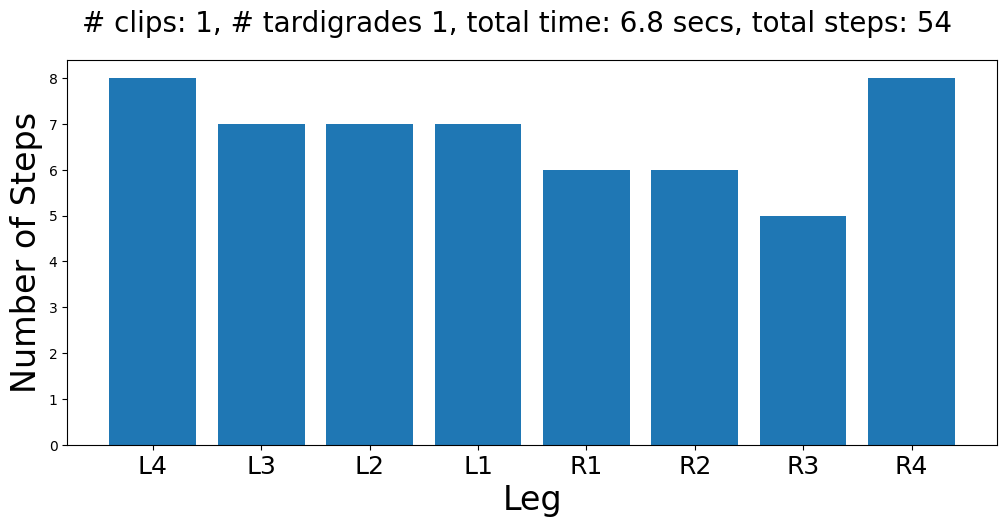

In [5]:
# Figure with # steps each leg, title has total # steps and total time

# get total number of steps from step_data
total_steps = step_data.shape[0]

# get the different clips from step_data
clips = sorted(list(set(step_data['clip'].values)))
num_clips = len(clips)

# get the tardigrades represented by these clips
# and get the total time covered by the clips
tardigrade_individuals = []
total_time = 0
for clip in clips:
    res = re.findall(r"[abcdefghijklmnopqrstuvwxyz]+", clip)[0]
    tardigrade = clip.split(res)[0]
    tardigrade_individuals.append(tardigrade)
    total_time += size_speed[clip]['analyzed_time']
    
tardigrade_individuals = sorted(list(set(tardigrade_individuals)))
num_tardigrades = len(tardigrade_individuals)
total_time = np.around(total_time,1)

# set up a figure

# choose legs from the step_data dataframe
# legs = sorted(list(set(step_data['ref_leg'])))
# or choose legs from leg_combos
legs = leg_combos['legs_all']

plt.style.use('default')
figwidth = 1.5 * len(legs)
f,a = plt.subplots(1,1,figsize=(figwidth,5))

# set the figure title
fig_title = '# clips: ' + str(num_clips)
fig_title += ', # tardigrades ' + str(num_tardigrades)
fig_title += ', total time: ' + str(total_time)
fig_title += ' secs, total steps: ' + str(total_steps)
f.suptitle(fig_title, fontsize = 20)

# plot number of steps for each leg
x = 0 # x-axis locations
for leg in legs:
    num_steps_for_leg = len(step_data[step_data['ref_leg'] == leg].values)
    plt.bar(x, num_steps_for_leg, color = 'tab:blue')
    x += 1
labels = legs
plt.xticks(range(0,len(legs)),labels, fontsize=18)
plt.ylabel('Number of Steps', fontsize = 24)
plt.xlabel('Leg', fontsize = 24)
plt.show()

# gait styles
### The gait style at a particular moment is defined by which legs are swinging (in front 3 pairs)
### For example, when 2 legs are swinging, it's a tetrapod gait (4 legs on the ground)

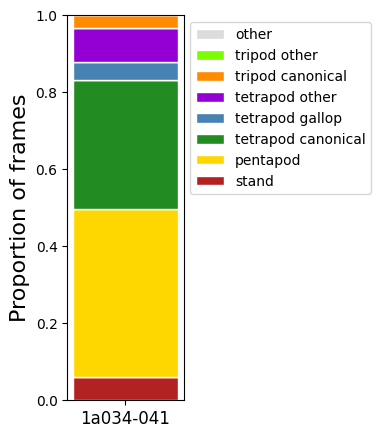

In [6]:
# given a list of clip folders
#    make a list of dictionaries of leg_swing_combo counts
#    plot a bar graph for each dictionary!

leg_set = 'lateral'
movie_folders = [os.path.join(tardi_gait, exp_dir, treatment_dir, x) for x in clip_folders]
dict_list = [get_leg_swing_combos(clip, leg_set) for clip in movie_folders]
f, ax = gait_style_plot(dict_list, clips, leg_set)
plt.show()

In [7]:
# if multiple clips, combine and show total
if len(dict_list) > 1:
    combined_dict = combineDictionariesWithCommonKeys(dict_list)
    combined_dict_proportions = valuesToProportions(combined_dict)
    f, ax = gait_style_plot([combined_dict_proportions], ['combined'], 'lateral')
    plt.show()

## fourth leg gait styles
### Stand (both legs down), Step (one leg up), Hop (both legs up)

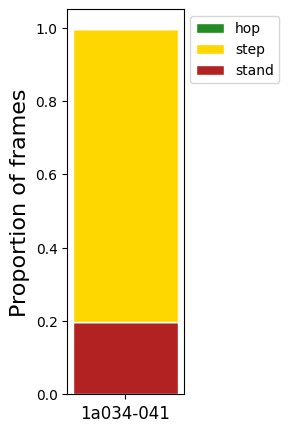

In [8]:
# given a list of clip folders
#    make a list of dictionaries of leg_swing_combo counts
#    plot a bar graph for each dictionary!
leg_set = 'rear'
dict_list = [get_leg_swing_combos(clip, leg_set) for clip in movie_folders]
f, ax = gait_style_plot(dict_list, clips, leg_set)
plt.show()

In [9]:
# if multiple clips, combine and show total
if len(dict_list) > 1:
    combined_dict = combineDictionariesWithCommonKeys(dict_list)
    combined_dict_proportions = valuesToProportions(combined_dict)
    f, ax = gait_style_plot([combined_dict_proportions], ['combined'], 'rear')
    plt.show()

In [10]:
# Choose a clip to plot
if len(movie_folders) > 1:
    print('\nMore than one clip - just plotting first one\n')
movie_folder = movie_folders[0]

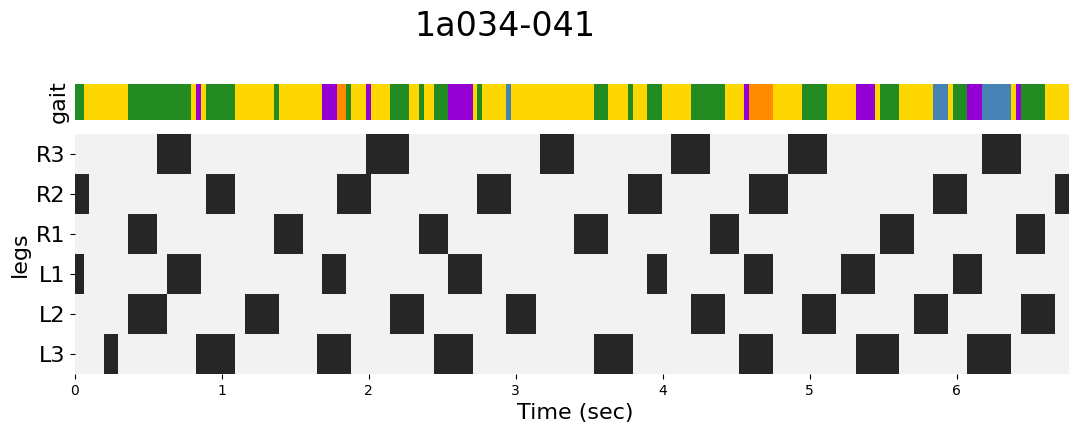

In [11]:
leg_set = 'lateral'
f = plotStepsAndGait(movie_folder, leg_set)
plt.show()

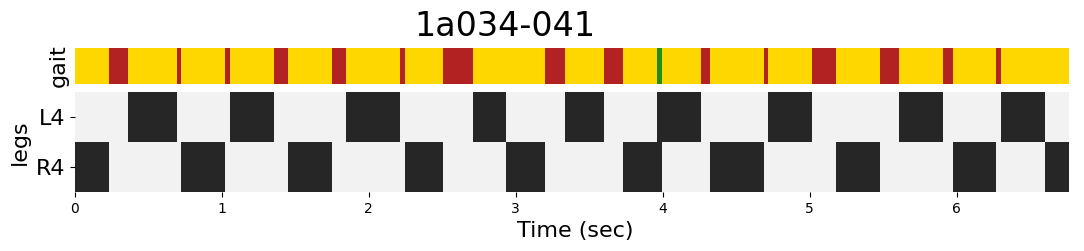

In [12]:
leg_set = 'rear'
f = plotStepsAndGait(movie_folder, leg_set)
plt.show()

# Size and speed comparisons

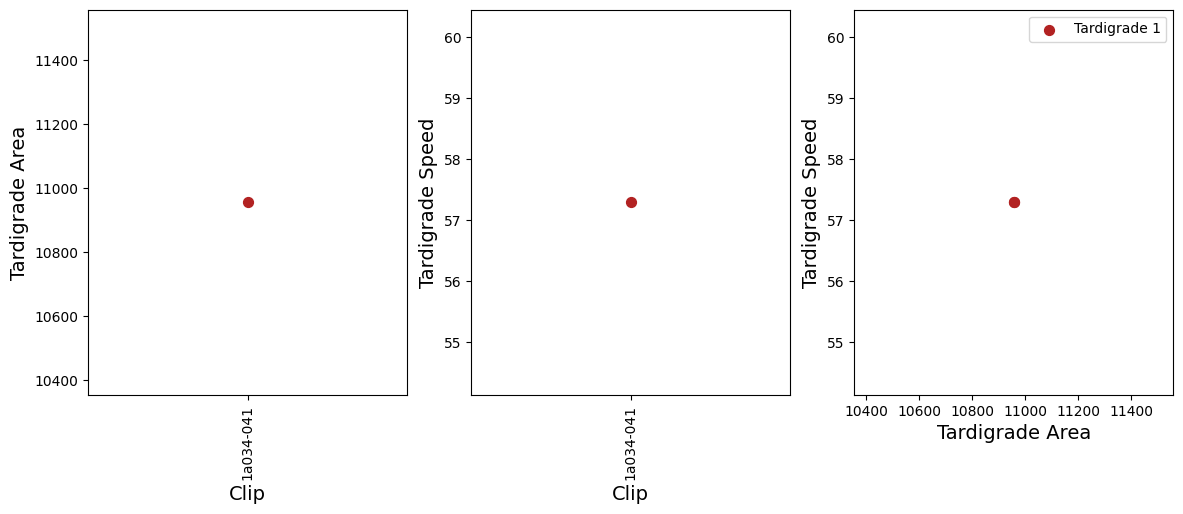

In [13]:
# Size vs. Speed
plot_colors = get_plot_colors()
f,(a1,a2,a3) = plt.subplots(1,3,figsize=(14,5))

scatter_x = []
scatter_y = []
scatter_cols = []
marker_size = 50
plotted_individuals = []
plt.style.use('default')

x_pos = 1
for clip in sorted(size_speed.keys()):
    
    # assign color to tardigrade
    res = re.findall(r"[abcdefghijklmnopqrstuvwxyz]+", clip)[0]
    tardigrade = int(clip.split(res)[0])
    
    tardigrade_color = plot_colors[tardigrade-1]
    
    tardigrade_area = size_speed[clip]['tardigrade_area']
    tardigrade_speed = size_speed[clip]['tardigrade_speed']
    
    if num_tardigrades == 1:
        a1.scatter(x_pos, tardigrade_area, c = tardigrade_color, s = marker_size)
        a2.scatter(x_pos, tardigrade_speed, c = tardigrade_color, s = marker_size)
        x_pos += 1
    else:
        a1.scatter(tardigrade, tardigrade_area, c = tardigrade_color, s = marker_size)
        a2.scatter(tardigrade, tardigrade_speed, c = tardigrade_color, s = marker_size)
    
    if tardigrade not in plotted_individuals:
        plotted_individuals.append(tardigrade)        
        a3.scatter(tardigrade_area, tardigrade_speed, s = marker_size, c = tardigrade_color, 
                   label = 'Tardigrade ' + str(tardigrade))
    
    scatter_x.append(tardigrade_area)
    scatter_y.append(tardigrade_speed)
    scatter_cols.append(tardigrade_color)
    
a3.scatter(scatter_x, scatter_y, c = scatter_cols, s = marker_size)

a1.set_ylabel('Tardigrade Area',  fontsize=14)  
a2.set_ylabel('Tardigrade Speed', fontsize=14)

# set up axes labels
if num_tardigrades == 1:
    a1.set_xticks(range(1, len(size_speed.keys())+1), sorted(size_speed.keys()), rotation=90)
    a1.set_xlabel('Clip', fontsize = 14)
    
    a2.set_xticks(range(1, len(size_speed.keys())+1), sorted(size_speed.keys()), rotation=90)
    a2.set_xlabel('Clip', fontsize = 14)
else:
    a1.set_xticks(range(1,len(plotted_individuals)+1), plotted_individuals)
    a1.set_xlabel('Tardigrades', fontsize = 14)

    a2.set_xticks(range(1,len(plotted_individuals)+1), plotted_individuals)
    a2.set_xlabel('Tardigrades', fontsize = 14)
    
a3.set_ylabel('Tardigrade Speed',fontsize=14)
a3.set_xlabel('Tardigrade Area', fontsize=14)
a3.legend()
plt.show()
    

# Compare gait parameters

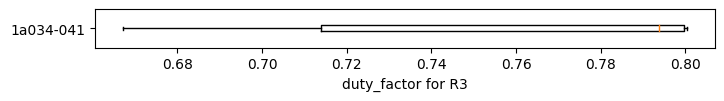

In [14]:
# How consistent is a given parameter between the different clips? ... a bit of quality control.
parameter = 'duty_factor' # stance_time, swing_time, duty_factor, gait_cycle
leg = 'R3'

clips = sorted(list(set(step_data['clip'].values)))

data_to_plot = []
for clip in clips:
#     print(clip)
    data_for_clip = step_data[step_data['clip'] == clip]
    data_for_leg = data_for_clip[data_for_clip['ref_leg']==leg]
    data_for_parameter = data_for_leg[parameter].values
    data_to_plot.append(data_for_parameter)

figheight = 0.5 * len(clips)
f = plt.figure(figsize = (8,figheight))
plt.boxplot(data_to_plot, vert=False)
locs, labels = plt.yticks()
labels = clips
plt.yticks(locs,labels)
plt.xlabel(parameter + ' for ' + leg)
plt.show()

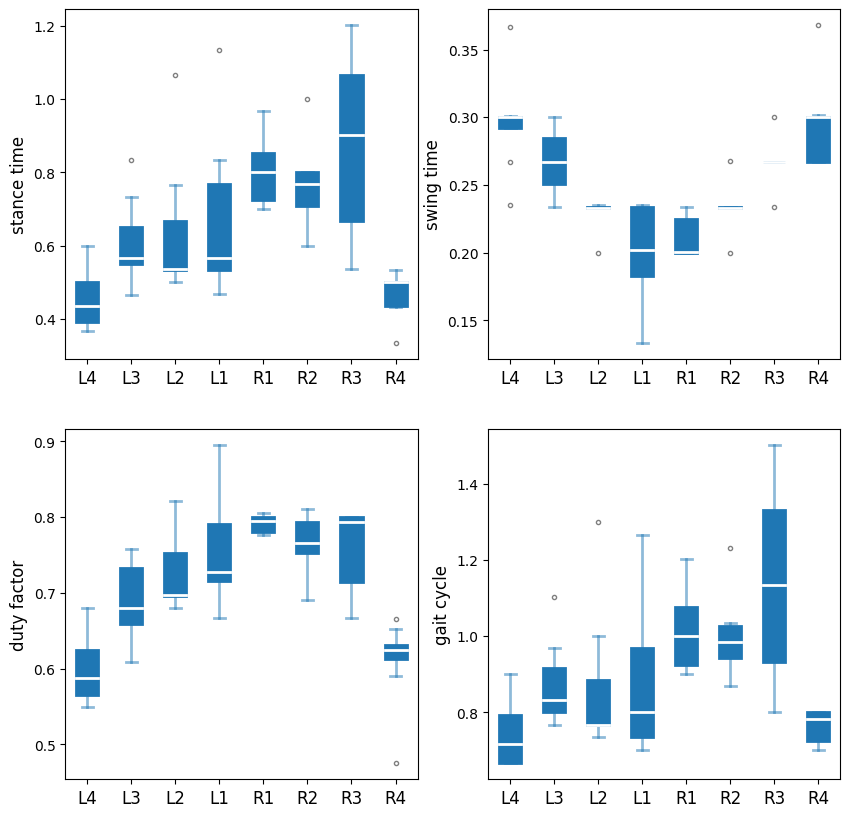

In [15]:
# Compare gait parameters for different legs
leg_set = leg_combos['legs_all'] # legs_all or legs_lateral or another combo above
parameters = ['stance_time', 'swing_time', 'duty_factor', 'gait_cycle']
plt.style.use('default') #seaborn-whitegrid seaborn-paper seaborn-talk seaborn-poster

f, axes = plt.subplots(2,2, figsize=(10,10))

for i, parameter in enumerate(parameters):
    leg_parameter_data = []
    for leg in leg_set:
        data_for_leg = step_data[step_data['ref_leg']==leg][parameter].values
        leg_parameter_data.append(data_for_leg)
    bp = f.axes[i].boxplot(leg_parameter_data, patch_artist=True)
    
    bp = formatBoxPlots(bp, ['tab:blue'], ['white'], ['lightsteelblue'])
     
    f.axes[i].set_ylabel(parameter.replace('_',' '), fontsize = 12)
    f.axes[i].set_xticks(range(1,len(leg_set)+1), labels=leg_set, fontsize = 12)

# locs, labels = plt.xticks()
# labels = leg_set
# plt.xticks(locs,labels)

plt.show()

## gait parameters vs. speed

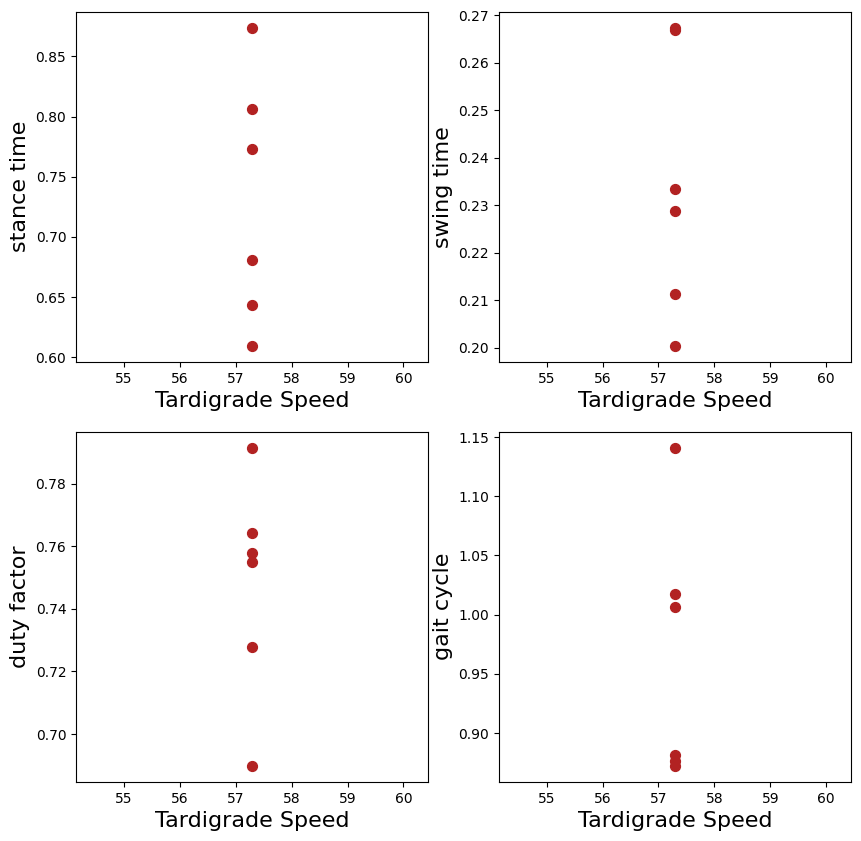

In [16]:
# four plots ... for each clip, scatter speed vs. gait parameters for each leg
# size_speed is a dictionary of size and speed, keyed on clip name
# step_data is a dataframe of all steps in the loaded experiments

# get the data we need
leg_set = leg_combos['legs_lateral'] # legs_lateral or another combo above
parameters = ['stance_time', 'swing_time', 'duty_factor', 'gait_cycle']
clips = sorted(list(set(step_data['clip'].values)))

# set up a figure
plt.style.use('default') #seaborn-whitegrid seaborn-paper seaborn-talk seaborn-poster
f, axes = plt.subplots(2,2, figsize=(10,10))
marker_size = 50
plot_colors = get_plot_colors()
marker_color = plot_colors[0]

# go through each parameter
for i, parameter in enumerate(parameters):
    # go through each clip
    for clip in clips:
        # get speed for clip
        speed_for_clip = size_speed[clip]['tardigrade_speed']
        data_for_clip = step_data[step_data['clip']==clip]
        # go through legs
        for leg in leg_set:
            # scatter speed vs. parameter for this leg
            mean_data_for_leg = np.mean(data_for_clip[data_for_clip['ref_leg']==leg][parameter].values)
            f.axes[i].scatter(speed_for_clip, mean_data_for_leg, s = marker_size, c = marker_color)
    f.axes[i].set_ylabel(parameter.replace('_',' '), fontsize = 16)
    f.axes[i].set_xlabel('Tardigrade Speed', fontsize = 16)

plt.show()

# left vs. right
## Compare stance, swing, period, duty between left and right sides

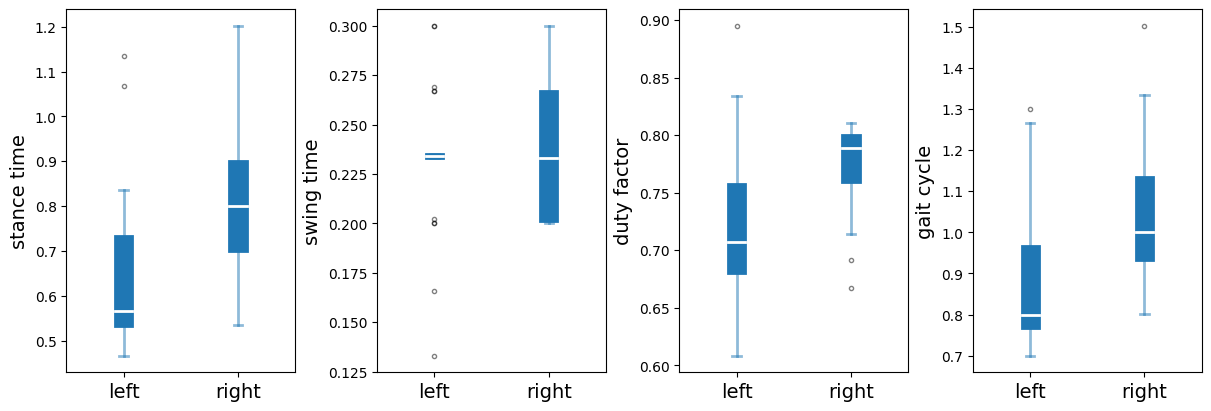

In [23]:
left_legs = leg_combos['legs_left']
right_legs = leg_combos['legs_right']

# set up a figure
plt.style.use('default')
f, axes = plt.subplots(1,4, figsize = (12,4), constrained_layout=True)
parameters = ['stance_time', 'swing_time', 'duty_factor', 'gait_cycle']

for i, parameter in enumerate(parameters):
    
    # get data from step_data 
    left_leg_data = step_data[step_data['ref_leg'].isin(left_legs)]
    right_leg_data = step_data[step_data['ref_leg'].isin(right_legs)]
    
    # get data for this parameter
    left_parameter = left_leg_data[parameter].values
    right_parameter = right_leg_data[parameter].values
    
    bp = f.axes[i].boxplot([left_parameter, right_parameter], patch_artist=True)
    bp = formatBoxPlots(bp, ['tab:blue'], ['white'], ['lightsteelblue'])
    
    # add axes labels
    f.axes[i].set_ylabel(parameter.replace('_',' '), fontsize=14)
    f.axes[i].set_xticks([1,2],['left','right'], fontsize = 14)
    

plt.show()

# left vs. right
## Compare metachronal lag between left and right sides

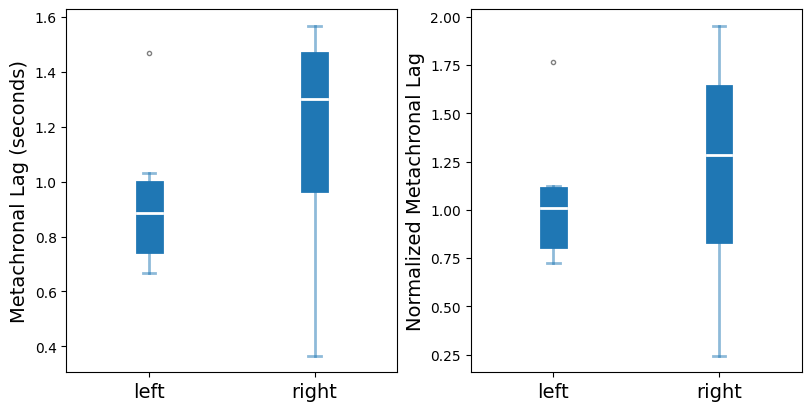

In [24]:
left_legs = leg_combos['legs_left']
right_legs = leg_combos['legs_right']

# get data from step_data 
left_leg_data = step_data[step_data['ref_leg'].isin(left_legs)]
right_leg_data = step_data[step_data['ref_leg'].isin(right_legs)]

left_metachronal_lag, left_normalized_metachronal_lag = get_metachronal_lag(left_leg_data)
right_metachronal_lag, right_normalized_metachronal_lag = get_metachronal_lag(right_leg_data)

# set up a figure
plt.style.use('default')
f, (a1, a2) = plt.subplots(1,2, figsize = (8,4), constrained_layout=True)

bp1 = a1.boxplot([left_metachronal_lag, right_metachronal_lag], patch_artist=True)
bp2 = a2.boxplot([left_normalized_metachronal_lag, right_normalized_metachronal_lag], patch_artist=True)
bp1 = formatBoxPlots(bp1, ['tab:blue'], ['white'], ['lightsteelblue'])
bp2 = formatBoxPlots(bp2, ['tab:blue'], ['white'], ['lightsteelblue'])

a1.set_xticks([1,2],['left','right'], fontsize = 14)
a1.set_ylabel('Metachronal Lag (seconds)', fontsize = 14)
a2.set_xticks([1,2],['left','right'], fontsize = 14)
a2.set_ylabel('Normalized Metachronal Lag', fontsize = 14)

plt.show()

# swing timing of neighboring legs
## anterior vs. opposite
## anterior: left side vs. right side

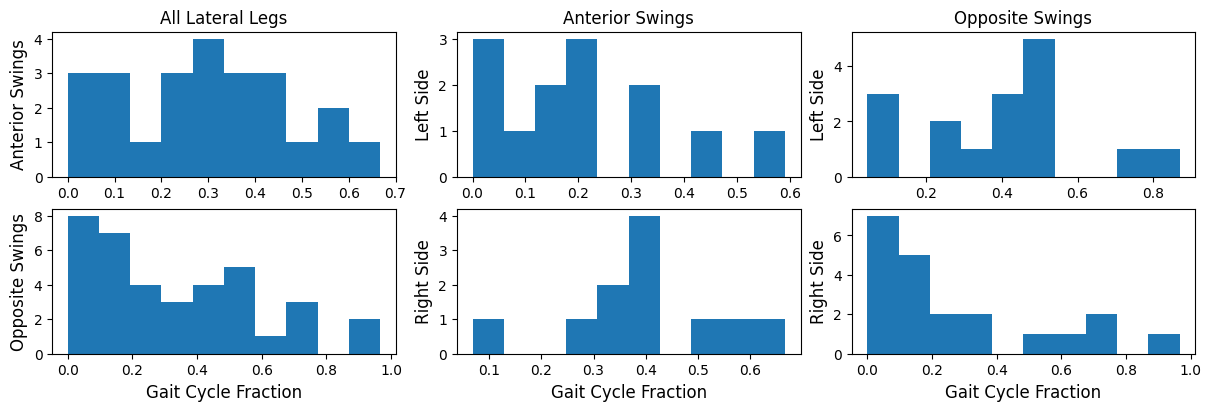

In [19]:
# for anterior swing timing, we want to get data for 2nd and 3rd leg pairs
# for opposite swing timing, we want to get data for 1st, 2nd, 3rd

# first, get anterior and opposite timing info for all leg_combos['legs_lateral']
# anterior swing_start is in step_data['anterior_swing_start']
# opposite swing_start is in step_data['contralateral_swing_start']
# these look like - anterior_leg:time1;time2 

legs = leg_combos['legs_lateral']

# convert list of anterior_leg:time1;time2 to list of times
def extractTimes(vec):
    # ugh this is soooo klugey
    vals = [x.split(':')[1] for x in vec]
    vals2 = [x.split(';') if ';' in x else x for x in vals]
    vals3 = []
    for x in vals2:
        if isinstance(x, list):
            vals3.extend(x)
        elif len(x) > 0: # some empty strings!
            vals3.append(x)
    vals4 = [float(x) for x in vals3]
    return vals4
     
anterior_swings_right = []
opposite_swings_right = []
anterior_swings_left = []
opposite_swings_left = []

for leg in legs:
    # get data for anterior and contralateral swing timing
    anterior_swing_data = step_data[step_data['ref_leg']==leg]['anterior_swing_start'].values
    opposite_swing_data = step_data[step_data['ref_leg']==leg]['contralateral_swing_start'].values
    
    # convert these vector (other_leg:time1;time2) into just the time values
    # and store in a dictionary
    anterior_swing_timing = extractTimes(anterior_swing_data)
    opposite_swing_timing = extractTimes(opposite_swing_data)
    
    # add these times to appropriate lists
    if leg in ['R1', 'R2', 'R3']:
        opposite_swings_right.extend(opposite_swing_timing)
        if leg in ['R3', 'R2']:
            anterior_swings_right.extend(anterior_swing_timing)
    elif leg in ['L1', 'L2', 'L3']:
        opposite_swings_left.extend(opposite_swing_timing)
        if leg in ['L3', 'L2']:
            anterior_swings_left.extend(anterior_swing_timing)

all_anterior_swings = anterior_swings_left + anterior_swings_right
all_opposite_swings = opposite_swings_left + opposite_swings_right
            
# 3 plots:
# 1. for all lateral legs, timing of anterior and opposite swings
# 2. for left vs. right leg pairs 2 and 3: timing of anterior swings
# 3. for left vs. right all lateral legs: timing of opposite swings

f, axes = plt.subplots(2,3, figsize = (12,4), constrained_layout = True)

# plot 1
axes[0,0].set_title('All Lateral Legs')
axes[0,0].hist(all_anterior_swings, 10)
axes[0,0].set_ylabel('Anterior Swings', fontsize = 12)

axes[1,0].hist(all_opposite_swings, 10)
axes[1,0].set_ylabel('Opposite Swings', fontsize = 12)
axes[1,0].set_xlabel('Gait Cycle Fraction', fontsize = 12)

# plot 2
axes[0,1].set_title('Anterior Swings')
axes[0,1].hist(anterior_swings_left, 10)
axes[0,1].set_ylabel('Left Side', fontsize = 12)
axes[1,1].hist(anterior_swings_right, 10)
axes[1,1].set_ylabel('Right Side', fontsize = 12)
axes[1,1].set_xlabel('Gait Cycle Fraction', fontsize = 12)

# plot 3
axes[0,2].set_title('Opposite Swings')
axes[0,2].hist(opposite_swings_left, 10)
axes[0,2].set_ylabel('Left Side', fontsize = 12)
axes[1,2].hist(opposite_swings_right, 10)
axes[1,2].set_ylabel('Right Side', fontsize = 12)
axes[1,2].set_xlabel('Gait Cycle Fraction', fontsize = 12)

plt.show()

# plot 'average steps' for a group of experiments

In [20]:
# get step stats for a group of legs
all_legs = leg_combos['legs_all']
legs = all_legs
leg_data = {}

for leg in legs:
    leg_data[leg]={}
    leg_data[leg]['stances'] = step_data[step_data.ref_leg == leg]['stance_time'].values
    leg_data[leg]['swings'] = step_data[step_data.ref_leg == leg]['swing_time'].values
    leg_data[leg]['gait_cycle'] = step_data[step_data.ref_leg == leg]['gait_cycle'].values

In [21]:
# set up a figure and some axes
def leg_plot(leg_data, legs_in_plot, rec_height = 0.8):
    fig_width = 16
    fig_height = 0.6 * len(legs_in_plot)
    
    y_levels = np.arange(len(legs_in_plot)) + 0.5
    y_levels_for_legs = dict(zip(legs_in_plot,y_levels))

    stance_color, swing_color = stanceSwingColors()
    
    (f, ax) = plt.subplots(1, figsize=(fig_width, fig_height))
    
    ax.set_yticks(y_levels)
    ax.set_yticklabels(legs, fontsize=12)
    plt.xticks(fontsize=12)
    ax.set_xlim([-0.2,2])
    buffer = rec_height/2 + 0.2
    ax.set_ylim([np.min(y_levels)-buffer, np.max(y_levels)+buffer])
    ax.set_ylabel('Legs', fontsize=16)
    ax.set_xlabel('Time (sec)', fontsize=16)
    
    return f, ax, y_levels_for_legs, rec_height, stance_color, swing_color

# plot stance and swing data on a figure
def plot_stance_swing(f, ax, leg, leg_data, start_x, rec_height, stance_color, swing_color):
    
    stances = leg_data[leg]['stances']
    swings = leg_data[leg]['swings']
    
    # add rectangle for stance
    ax.add_patch(Rectangle((start_x, y_levels_for_legs[leg] - rec_height/2), np.mean(stances), rec_height, 
                           edgecolor='k', facecolor=stance_color, lw=1))

    # add error bar for stance

    # add rectangle for swing
    ax.add_patch(Rectangle((start_x + np.mean(stances), y_levels_for_legs[leg] - rec_height/2), np.mean(swings), rec_height, 
                           edgecolor='k', facecolor=swing_color, lw=1))

    # add error bar for swing

    # add steps on either side of this one
    gait_cycle = np.mean(stances) + np.mean(swings)
    
    # to left
    left_start = start_x - gait_cycle
    ax.add_patch(Rectangle((left_start, y_levels_for_legs[leg] - rec_height/2), np.mean(stances), rec_height, 
                           edgecolor='k', facecolor=stance_color, lw=1))
    ax.add_patch(Rectangle((left_start + np.mean(stances), y_levels_for_legs[leg] - rec_height/2), 
                           np.mean(swings), rec_height, edgecolor='k', facecolor=swing_color, lw=1))
    
    left_start = start_x - 2 * gait_cycle
    ax.add_patch(Rectangle((left_start, y_levels_for_legs[leg] - rec_height/2), np.mean(stances), rec_height, 
                           edgecolor='k', facecolor=stance_color, lw=1))
    ax.add_patch(Rectangle((left_start + np.mean(stances), y_levels_for_legs[leg] - rec_height/2), 
                           np.mean(swings), rec_height, edgecolor='k', facecolor=swing_color, lw=1))
    
    # to right
    right_start = start_x + gait_cycle
    ax.add_patch(Rectangle((right_start, y_levels_for_legs[leg] - rec_height/2), np.mean(stances), rec_height, 
                           edgecolor='k', facecolor=stance_color, lw=1))
    ax.add_patch(Rectangle((right_start + np.mean(stances), y_levels_for_legs[leg] - rec_height/2), 
                           np.mean(swings), rec_height, edgecolor='k', facecolor=swing_color, lw=1))
    
    right_start = start_x + 2 * gait_cycle
    ax.add_patch(Rectangle((right_start, y_levels_for_legs[leg] - rec_height/2), np.mean(stances), rec_height, 
                           edgecolor='k', facecolor=stance_color, lw=1))
    ax.add_patch(Rectangle((right_start + np.mean(stances), y_levels_for_legs[leg] - rec_height/2), 
                           np.mean(swings), rec_height, edgecolor='k', facecolor=swing_color, lw=1))
    
    return f, ax

def get_mid_swing_timing(leg_1,leg_2):  
    # get a list of all mid_swing times for a pair of legs
    other_leg_mid_swing_col = leg_2 + '_mid_swings'
    other_leg_mid_swing_strings = step_data[step_data.ref_leg==leg_1][other_leg_mid_swing_col].values

    other_leg_mid_swing_data = [x.split(':')[1] for x in other_leg_mid_swing_strings]

    mid_swing_timing = []

    for item in other_leg_mid_swing_data:
        if ';' in item:
            stuff = [float(x) for x in item.split(';')]
            mid_swing_timing.extend(stuff)
        elif len(item)>0:
            mid_swing_timing.append(float(item))

    return(mid_swing_timing)

def get_swing_leg_start(step_leg, swing_leg, mid_swing_timing):
    
    # get list of mid_swing times between two legs
    mid_swing_timing = get_mid_swing_timing(step_leg, swing_leg)
    
    # find the average of the mid_swing times
    mid_swing_time = np.mean(mid_swing_timing)
    
    # find start_x for this leg:
    # mid_swing_timing is expressed as % of gait_cycle of the reference leg (step_leg in this case!)  
    # so we need to get the gait_cycle of the step_leg
    step_leg_gait_cycle = np.mean(leg_data[step_leg]['gait_cycle'])
    
    # convert the mid_swing time from a gait cycle fraction to real seconds
    mid_swing_secs = mid_swing_time * step_leg_gait_cycle
    
    # from this mid swing time, find start of gait cycle for other leg (step down!)
    # it will be mid_swing - half of swing - stance
    swing_leg_stance = np.mean(leg_data[swing_leg]['stances'])
    swing_leg_swing = np.mean(leg_data[swing_leg]['swings'])
    
    start_gait_leg =  mid_swing_secs - swing_leg_swing / 2 - swing_leg_stance
    return start_gait_leg




start leg:  R3
opposite leg:  L3
other_lateral_legs ['R2', 'R1']
other_opposite_legs ['L2', 'L1']


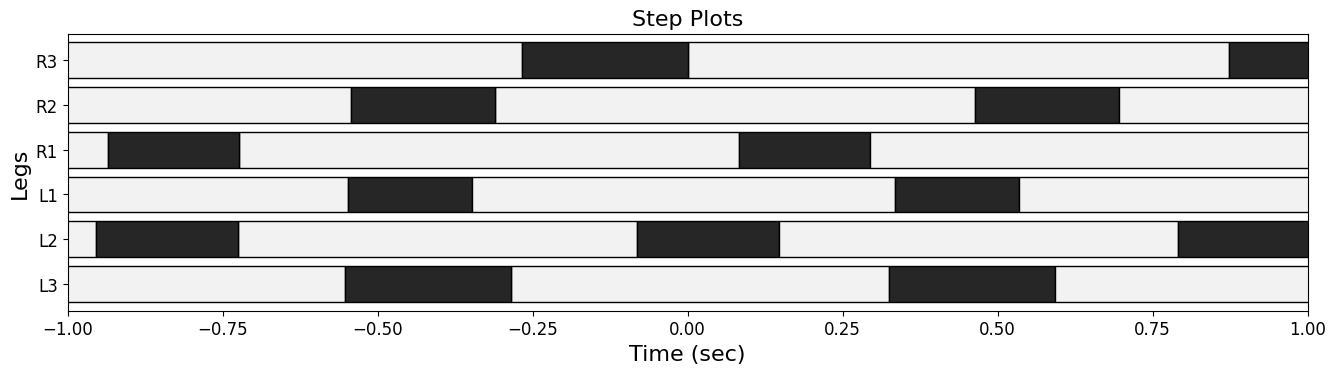

In [22]:
start_leg = 'R3'

# which legs should we plot?
lateral_legs = leg_combos['legs_lateral']
right_lateral = leg_combos['legs_right']
left_lateral = leg_combos['legs_left']
legs = lateral_legs # lateral_legs or right_lateral or left_lateral

opposite_dict, anterior_dict = getOppAndAntLeg()
posterior_dict = getPosteriorLeg()
opposite_leg = opposite_dict[start_leg]

print('start leg: ', start_leg)
print('opposite leg: ', opposite_leg)

start_leg_stance = np.mean(leg_data[start_leg]['stances'])
start_leg_swing = np.mean(leg_data[start_leg]['swings'])
start_leg_gait_cycle = start_leg_stance + start_leg_swing

# set up a figure
f, ax, y_levels_for_legs, rec_height, stance_color, swing_color = leg_plot(leg_data,legs)

# make a plot for starting leg ... this looks good.
start_gait = 0
f, ax = plot_stance_swing(f, ax, start_leg, leg_data, start_gait, rec_height, stance_color, swing_color)

# get ipsilateral and contralateral legs for starting leg
if start_leg in lateral_legs:
    if 'R' in start_leg:
        other_lateral_legs = right_lateral.copy()
        other_opposite_legs = left_lateral.copy()
    else:
        other_lateral_legs = left_lateral.copy()
        other_opposite_legs = right_lateral.copy()
other_lateral_legs.remove(start_leg)
other_opposite_legs.remove(opposite_leg)
print('other_lateral_legs', other_lateral_legs)
print('other_opposite_legs', other_opposite_legs)

# add other ipsilateral legs to plot ... get their timing from the leg posterior to each leg
start_step = 0
for leg in other_lateral_legs:
    posterior_leg = posterior_dict[leg]
    mid_swing_timing = get_mid_swing_timing(posterior_leg, leg)
    start_gait_leg = get_swing_leg_start(posterior_leg, leg, mid_swing_timing)  
    start_step += start_gait_leg
    f, ax = plot_stance_swing(f, ax, leg, leg_data, start_step, 
                              rec_height, stance_color, swing_color)

# add opposite leg to plot ... this is good
mid_swing_timing = get_mid_swing_timing(start_leg, opposite_leg)
start_step_opposite_leg = get_swing_leg_start(start_leg, opposite_leg, mid_swing_timing)
f, ax = plot_stance_swing(f, ax, opposite_leg, leg_data, start_step_opposite_leg, 
                          rec_height, stance_color, swing_color)

# add other contralateral legs to plot ... ... get their timing from the leg posterior to each leg
for leg in other_opposite_legs:
    posterior_leg = posterior_dict[leg]
    mid_swing_timing = get_mid_swing_timing(posterior_leg, leg)
    start_gait_leg = get_swing_leg_start(posterior_leg, leg, mid_swing_timing)
    start_step_opposite_leg += start_gait_leg
    f, ax = plot_stance_swing(f, ax, leg, leg_data, start_step_opposite_leg, 
                              rec_height, stance_color, swing_color)

# right_lim = 1. * start_leg_gait_cycle
# left_lim = -1.4 * start_leg_gait_cycle
# ax.set_xlim(left_lim,right_lim)

ax.set_xlim(-1, 1)
plt.title('Step Plots', fontsize=16)
# plt.title(experiment_dir.replace('_',' '), fontsize=16)
plt.savefig('step_plot.png',dpi=150)
plt.show()